### 공기의 질을 측정한 데이터
1. airquanlity 데이터에 대해서 결측치가 가장 많은 변수를 찾아서 해당 결측치를 0으로 대체하고 결측치를 제외한 평균과 0으로 대치한 후 평균의 차이를 구하시오
2. wind 변수에 대해서 Min-Max 정규화를 수행 한 후 평균 값과 Z 정규화를 수행 한 후 평균 값의 차이를 구하시오
3. 월별 평균 기온을 구하시오

In [1]:
import pandas as pd

In [2]:
air = pd.read_csv("./airquality.csv")
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [4]:
air.isna().sum() # 결측치가 가장 많은 변수는 Ozone

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [13]:
air['Ozone'].mean() #42.129310

42.12931034482759

In [14]:
air['Ozone_fillna'] = air['Ozone'].fillna(0)

In [15]:
air['Ozone_fillna']

0      41.0
1      36.0
2      12.0
3      18.0
4       0.0
       ... 
148    30.0
149     0.0
150    14.0
151    18.0
152    20.0
Name: Ozone_fillna, Length: 153, dtype: float64

In [16]:
air['Ozone_fillna'].mean()

31.941176470588236

# 1번 답

In [17]:
air['Ozone'].mean() - air['Ozone_fillna'].mean()

10.188133874239352

In [21]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

air['Wind_mm']= MmScaler.fit_transform(air[['Wind']])

air['Wind_mm'].mean()

0.4346061231510147

In [22]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day,Ozone_fillna,Wind_mm
0,41.0,190.0,7.4,67,5,1,41.0,0.300000
1,36.0,118.0,8.0,72,5,2,36.0,0.331579
2,12.0,149.0,12.6,74,5,3,12.0,0.573684
3,18.0,313.0,11.5,62,5,4,18.0,0.515789
4,NaN,NaN,14.3,56,5,5,0.0,0.663158
...,...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,30.0,0.273684
149,NaN,145.0,13.2,77,9,27,0.0,0.605263
150,14.0,191.0,14.3,75,9,28,14.0,0.663158
151,18.0,131.0,8.0,76,9,29,18.0,0.331579


In [24]:
## Scaler 선택 및 import
from sklearn.preprocessing import StandardScaler

# Scaler 객체 생성
StdScaler = StandardScaler()


air['Wind_z'] = StdScaler.fit_transform(air[['Wind']])
air['Wind_z'].mean()

-2.322035084183334e-17

# 2번 답

In [25]:
air['Wind_mm'].mean() - air['Wind_z'].mean()

0.4346061231510147

# 3번 답

In [34]:
air[['Month','Temp']].groupby(['Month']).mean()

,Temp
Month,
5,65.548387
6,79.100000
7,83.903226
8,83.967742
9,76.900000


### 근무자 정보를 측정한 데이터
1. Attrition은 퇴사 여부 데이터를 (yes:1, no:0)으로 데이터를 변환하여 새로운 파생변수에 대입하고 범주별 레코드 수를 계산하시오
2. 범주형 변수 중 유일한 값을 1개만 가지고 있는 컬럼을 찾아내어 그 컬럼을 데이터에서 제거하시오
3. 원래 데이터에서 숫자형인 컬럼만 추출하여 새로운 데이터프레임으로 생성하고, 각 변수간의 상관계수(피어슨 상관계수)를 구하시오

# 1번

In [35]:
data = pd.read_csv("./HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
data['Attrition_bi'] = data['Attrition'].map({
    'Yes':1,
    'No':0
}
)
data[['Attrition','Attrition_bi']].head()

,Attrition,Attrition_bi
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,No,0


In [39]:
data['Attrition_bi'].value_counts()

0    1233
1     237
Name: Attrition_bi, dtype: int64

# 2번

In [47]:
data['Age'].dtype

dtype('int64')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [50]:
list = []
for col in data.columns:
    if data[col].dtype == 'object':
        list.append(col)

list

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [53]:
for i in list:
    print('col: ', i, '/unique values: ', data[i].unique())

col:  Attrition /unique values:  ['Yes' 'No']
col:  BusinessTravel /unique values:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
col:  Department /unique values:  ['Sales' 'Research & Development' 'Human Resources']
col:  EducationField /unique values:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
col:  Gender /unique values:  ['Female' 'Male']
col:  JobRole /unique values:  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
col:  MaritalStatus /unique values:  ['Single' 'Married' 'Divorced']
col:  Over18 /unique values:  ['Y']
col:  OverTime /unique values:  ['Yes' 'No']


In [56]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [57]:
data.drop('Over18', axis=1, inplace=True)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_bi'],
      dtype='object')

In [58]:
data.info() # 컬럼이 36개에서 35개 되었습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 3번

In [59]:
data = pd.read_csv("./HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [60]:
list = []
for col in data.columns:
    if data[col].dtype != 'object':
        list.append(col)

list

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [63]:
len(list)

26

In [64]:
data_new = data[list]
data_new

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [66]:
data_new.corr(method='pearson')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [74]:
data_new['EmployeeCount'].dtype

dtype('int64')

In [75]:
data_new['StandardHours'].dtype

dtype('int64')

In [76]:
data_new['EmployeeCount'].unique() # unique 값이 하나

array([1], dtype=int64)

In [77]:
data_new['StandardHours'].unique() # unique 값이 하나

array([80], dtype=int64)

 # unique 값이 하나인 것들은 분산이 없어서 NaN 값이 나온다고 합니다.

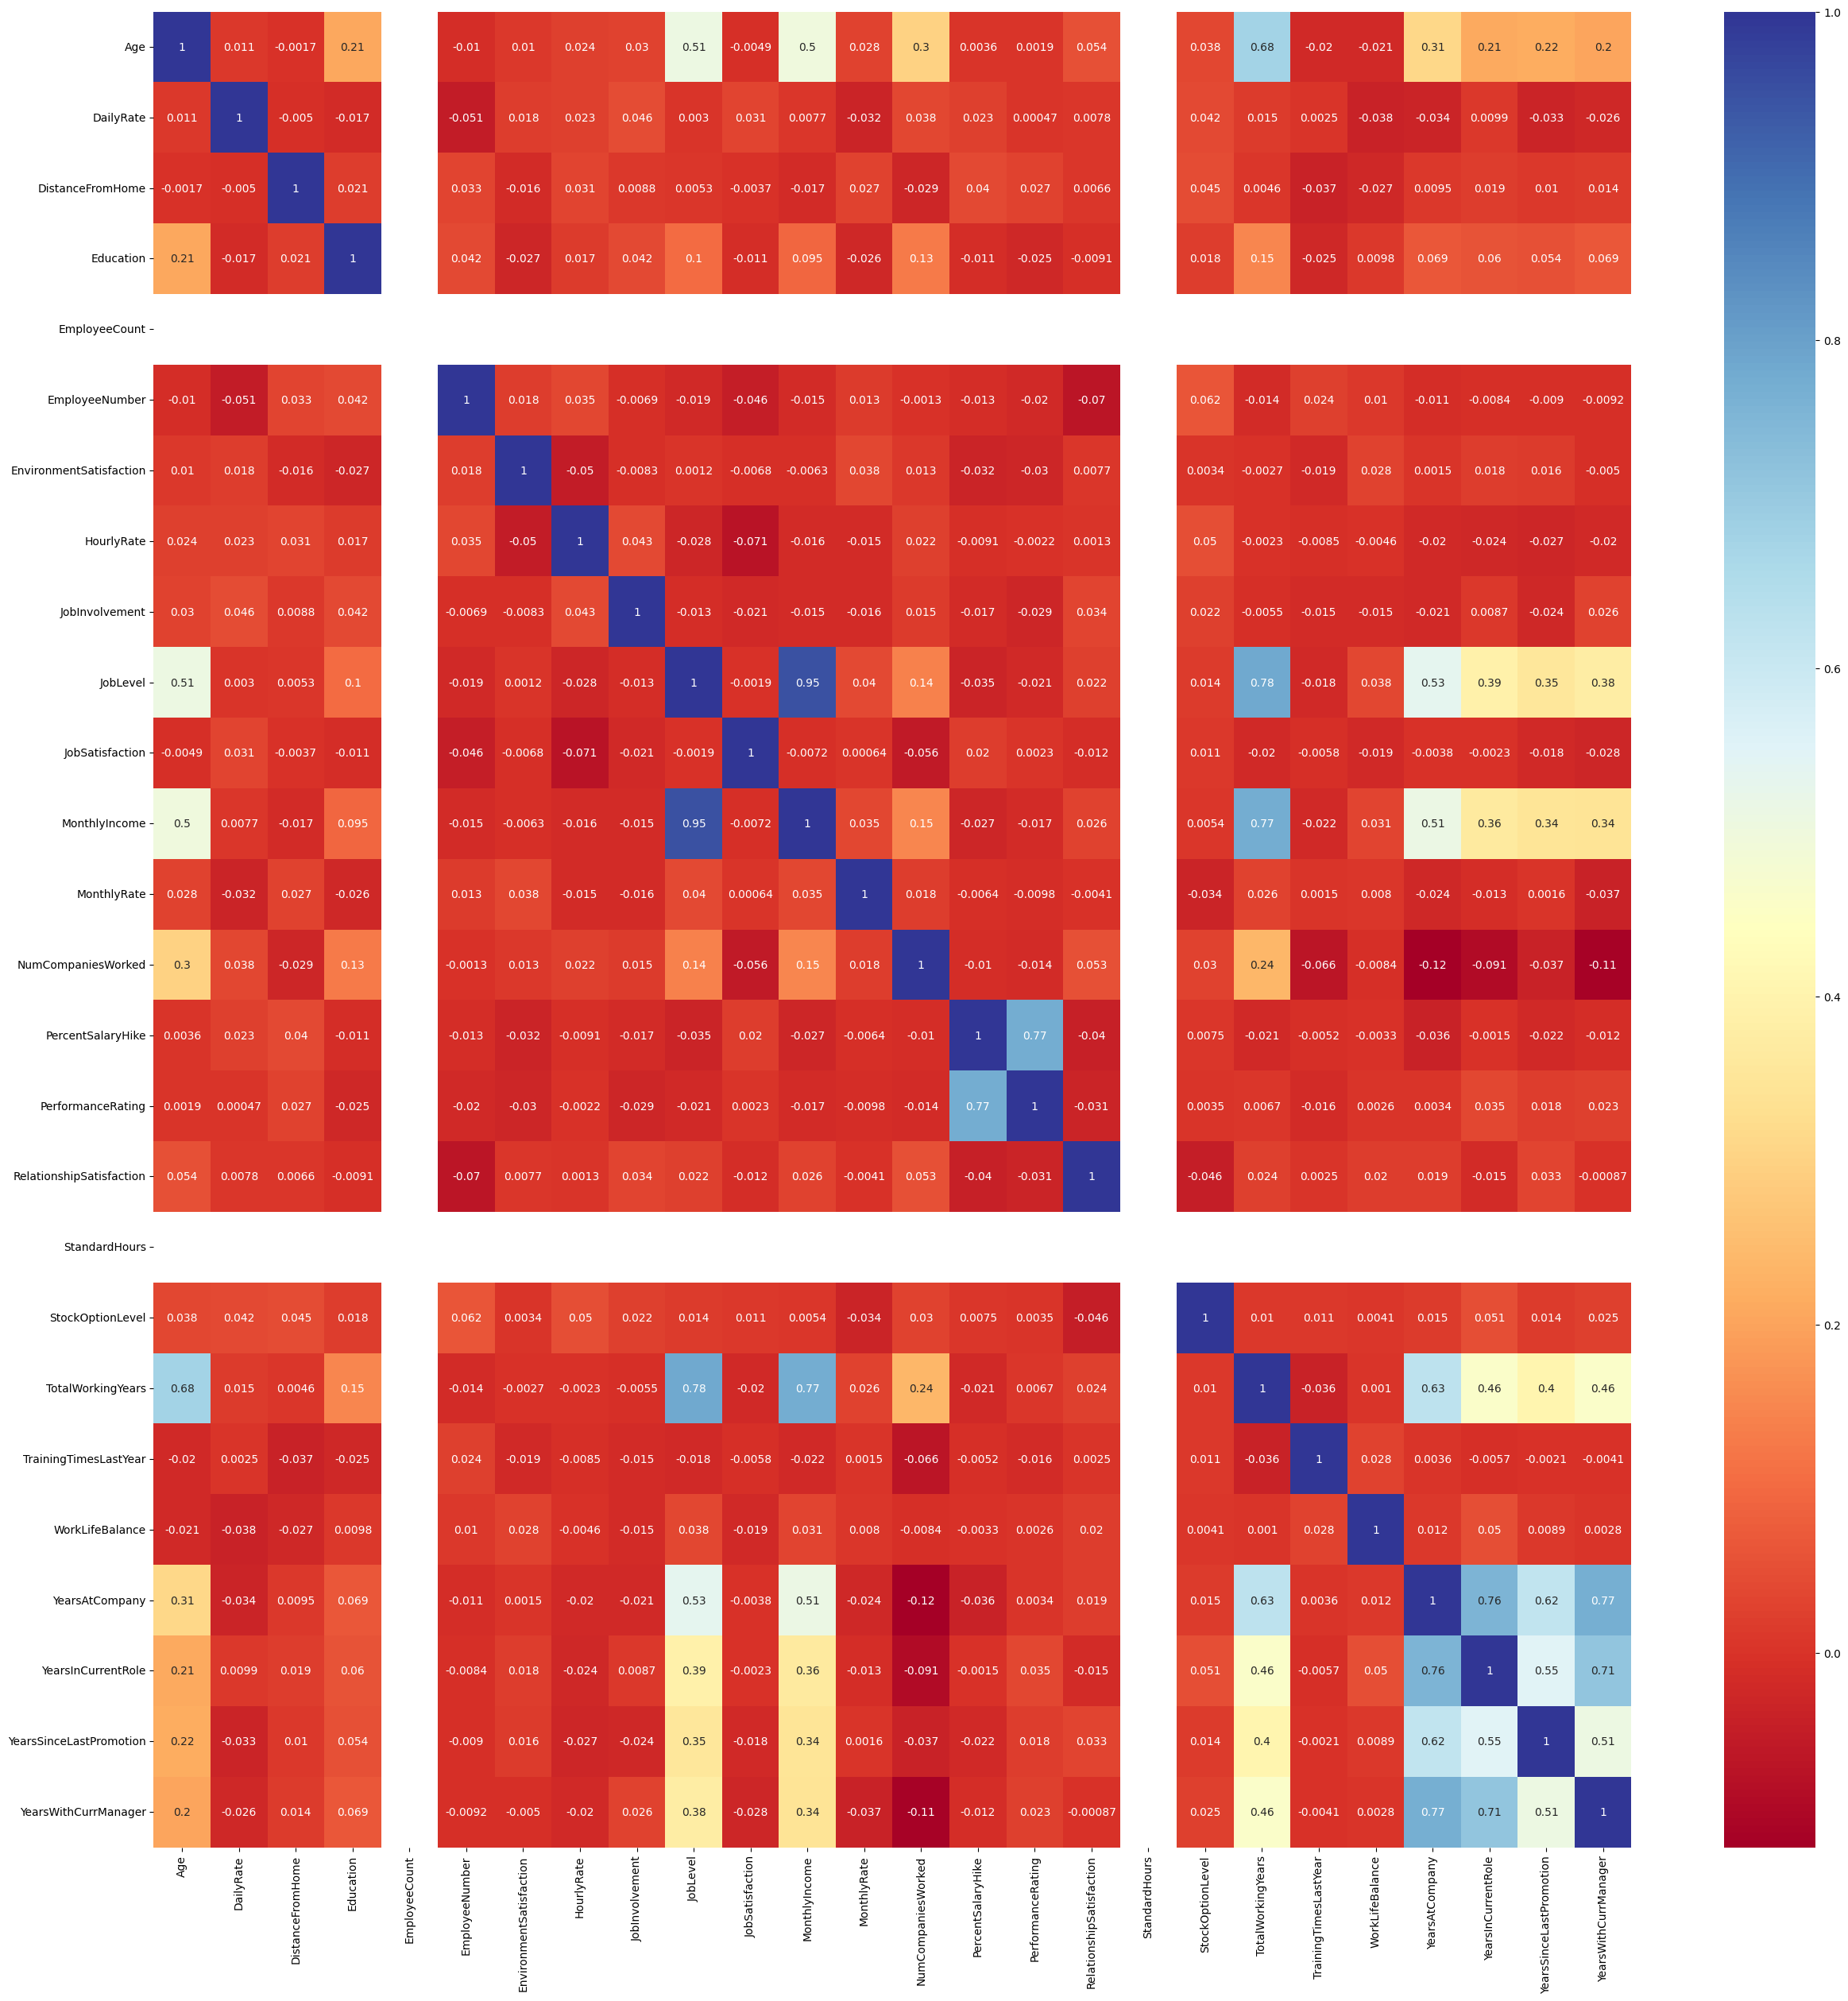

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(data_new.corr(), annot = True, cmap = 'RdYlBu')
plt.show()